# Final Project Journal Autism Prevalence Analysis
Student Hannah Raquel Melio  
Course Data Science Programming  
Date December 2025  

## Purpose
This journal documents my full process from reading the original dataset, cleaning it, saving a cleaned version, and then using the cleaned data for analysis and visualizations.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9, 5)


## Step 1 Load Original Dataset
I start by loading the original raw dataset file.


In [4]:
raw_df = pd.read_csv(r"Prevalence Estimates Over Time.csv")
raw_df.head()


,State,Denominator,"Prevalence Estimates per 1,000 Children",Lower CI,Upper CI,Prevalence Range,Show Lower and Upper CI,Year,Data Set
0,Alabama,35472.0,3.3,2.7,3.9,<10,Yes,2002,ADDM Network*
1,Alabama,11676.0,4.6,3.5,6.0,<10,Yes,2004,ADDM Network*
2,Alabama,35126.0,6.0,5.3,6.9,<10,Yes,2006,ADDM Network*
3,Alabama,36566.0,4.8,4.1,5.5,<10,Yes,2008,ADDM Network*
4,Alabama,21833.0,5.7,4.8,6.8,<10,Yes,2010,ADDM Network*


## Step 2 Initial Data Exploration
I check the size, columns, and missing values in the raw dataset.


In [5]:
raw_df.shape

(5136, 9)

In [6]:
list(raw_df.columns)

['State',
 'Denominator',
 'Prevalence Estimates per 1,000 Children',
 'Lower CI',
 'Upper CI',
 'Prevalence Range',
 'Show Lower and Upper CI',
 'Year',
 'Data Set']

In [7]:
raw_df.isna().sum()

State                                         0
Denominator                                  98
Prevalence Estimates per 1,000 Children       0
Lower CI                                   2568
Upper CI                                   2568
Prevalence Range                              0
Show Lower and Upper CI                       0
Year                                          0
Data Set                                      0
dtype: int64

## Step 3 Data Cleaning
I rename columns to make them easier to use in Python. Then I convert year and prevalence to numeric values.


In [8]:
df_clean = raw_df.rename(columns={
    "State": "state",
    "Year": "year",
    "Data Set": "data_set",
    "Prevalence Estimates per 1,000 Children": "prevalence_per_1000",
    "Lower CI": "lower_ci",
    "Upper CI": "upper_ci"
})

df_clean["year"] = pd.to_numeric(df_clean["year"], errors="coerce")
df_clean["prevalence_per_1000"] = pd.to_numeric(df_clean["prevalence_per_1000"], errors="coerce")
df_clean["lower_ci"] = pd.to_numeric(df_clean["lower_ci"], errors="coerce")
df_clean["upper_ci"] = pd.to_numeric(df_clean["upper_ci"], errors="coerce")

df_clean.head()


,state,Denominator,prevalence_per_1000,lower_ci,upper_ci,Prevalence Range,Show Lower and Upper CI,year,data_set
0,Alabama,35472.0,3.3,2.7,3.9,<10,Yes,2002,ADDM Network*
1,Alabama,11676.0,4.6,3.5,6.0,<10,Yes,2004,ADDM Network*
2,Alabama,35126.0,6.0,5.3,6.9,<10,Yes,2006,ADDM Network*
3,Alabama,36566.0,4.8,4.1,5.5,<10,Yes,2008,ADDM Network*
4,Alabama,21833.0,5.7,4.8,6.8,<10,Yes,2010,ADDM Network*


In [9]:
df_clean.isna().sum()

state                         0
Denominator                  98
prevalence_per_1000           0
lower_ci                   2568
upper_ci                   2568
Prevalence Range              0
Show Lower and Upper CI       0
year                          0
data_set                      0
dtype: int64

## Step 4 Save Cleaned Dataset
I save the cleaned dataset to a new CSV file so I can reuse it for analysis.


In [10]:
df_clean.to_csv(r"autism_prevalence_cleaned.csv", index=False)
print("Saved", r"autism_prevalence_cleaned.csv")


Saved autism_prevalence_cleaned.csv


## Step 5 Load Cleaned Dataset for Analysis
I load the cleaned dataset to begin analysis.


In [11]:
df = pd.read_csv(r"autism_prevalence_cleaned.csv")
df.head()


,state,Denominator,prevalence_per_1000,lower_ci,upper_ci,Prevalence Range,Show Lower and Upper CI,year,data_set
0,Alabama,35472.0,3.3,2.7,3.9,<10,Yes,2002,ADDM Network*
1,Alabama,11676.0,4.6,3.5,6.0,<10,Yes,2004,ADDM Network*
2,Alabama,35126.0,6.0,5.3,6.9,<10,Yes,2006,ADDM Network*
3,Alabama,36566.0,4.8,4.1,5.5,<10,Yes,2008,ADDM Network*
4,Alabama,21833.0,5.7,4.8,6.8,<10,Yes,2010,ADDM Network*


## Question 1
What is the autism prevalence rate for each year included in the dataset

I calculate the average prevalence for each year and show it in a table and a line chart.


In [12]:
yearly_avg = (
    df.dropna(subset=["year", "prevalence_per_1000"])
      .groupby("year")["prevalence_per_1000"]
      .mean()
      .sort_index()
)

yearly_avg


year
2000     2.562162
2001     2.624038
2002     3.431092
2003     3.583486
2004     4.327273
2005     4.380392
2006     5.479646
2007     6.829825
2008     7.265812
2009     7.065347
2010     8.342982
2011    11.659310
2012     9.919828
2013    10.250962
2014    11.371429
2015    10.590385
2016    12.682609
2017    12.916000
2018    14.957018
2019    14.861165
2020    20.518072
2021    17.181553
2022    24.003468
Name: prevalence_per_1000, dtype: float64

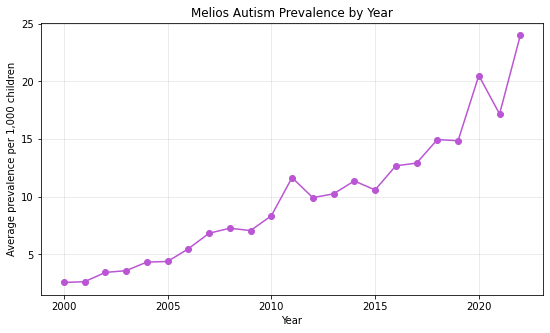

In [13]:
plt.figure()
plt.plot(yearly_avg.index, yearly_avg.values, marker="o", color="mediumorchid")
plt.title("Melios Autism Prevalence by Year")
plt.xlabel("Year")
plt.ylabel("Average prevalence per 1,000 children")
plt.grid(alpha=0.3)
plt.show()


Conclusion  
Autism prevalence changes by year and the overall pattern shows an increase over time.


## Question 2
Which years show the largest increases in autism prevalence across states

I calculate the year to year change in the yearly average prevalence. Larger values mean larger increases from the previous year.


In [14]:
yearly_change = yearly_avg.diff()
yearly_change


year
2000         NaN
2001    0.061876
2002    0.807054
2003    0.152394
2004    0.743786
2005    0.053119
2006    1.099254
2007    1.350179
2008    0.435987
2009   -0.200465
2010    1.277636
2011    3.316328
2012   -1.739483
2013    0.331134
2014    1.120467
2015   -0.781044
2016    2.092224
2017    0.233391
2018    2.041018
2019   -0.095852
2020    5.656907
2021   -3.336519
2022    6.821915
Name: prevalence_per_1000, dtype: float64

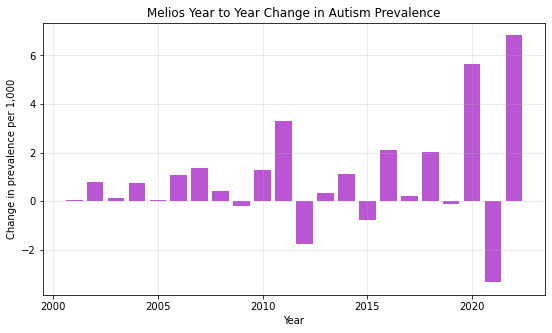

In [30]:
plt.figure()
plt.bar(yearly_change.index, yearly_change.values, color="mediumorchid")
plt.title("Melios Year to Year Change in Autism Prevalence")
plt.xlabel("Year")
plt.ylabel("Change in prevalence per 1,000")
plt.grid(alpha=0.3)
plt.show()

Conclusion  
The tallest bars show the years with the largest increases in average prevalence.


## Question 3
How does autism prevalence differ by state in the most recent year of data

I find the most recent year and compare states using that year only. I plot the top 10 states to keep the chart easy to read.


In [16]:
most_recent_year = df["year"].max()
print("Most recent year", int(most_recent_year))


Most recent year 2022


In [17]:
state_recent = (
    df[df["year"] == most_recent_year]
      .dropna(subset=["state", "prevalence_per_1000"])
      .groupby("state")["prevalence_per_1000"]
      .mean()
      .sort_values(ascending=False)
)

state_recent.head(10)


state
Pennsylvania     38.650000
Maine            34.933333
Massachusetts    34.300000
Minnesota        33.550000
Florida          31.100000
California       30.825000
Arizona          28.725000
New York         28.633333
Delaware         28.033333
Virginia         27.866667
Name: prevalence_per_1000, dtype: float64

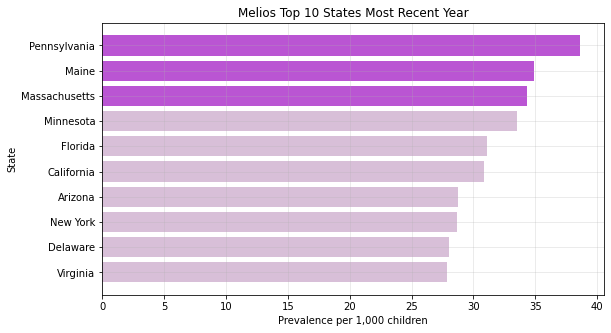

In [26]:
# Keep top 10 states sorted for plotting
top10 = state_recent.head(10).sort_values()

# Color rule: top 3 mediumorchid, rest thistle
colors = ["mediumorchid" if i >= len(top10) - 3 else "thistle" for i in range(len(top10))]

plt.figure()
plt.barh(top10.index.astype(str), top10.values, color=colors)
plt.title("Melios Top 10 States Most Recent Year")
plt.xlabel("Prevalence per 1,000 children")
plt.ylabel("State")
plt.grid(alpha=0.3)
plt.show()


Conclusion  
Autism prevalence varies by state in the most recent year. Some states report higher averages than others.


## Question 4
How has the reported autism prevalence changed from the earliest year in the dataset to the most recent year

I compare the yearly average from the earliest year to the yearly average from the most recent year and show a simple bar chart.


In [24]:
earliest_year = yearly_avg.index.min()
latest_year = yearly_avg.index.max()

earliest_avg = yearly_avg.loc[earliest_year]
latest_avg = yearly_avg.loc[latest_year]

print("Earliest year", int(earliest_year), "average", round(earliest_avg, 2))
print("Most recent year", int(latest_year), "average", round(latest_avg, 2))
print("Difference", round(latest_avg - earliest_avg, 2))


Earliest year 2000 average 2.56
Most recent year 2022 average 24.0
Difference 21.44


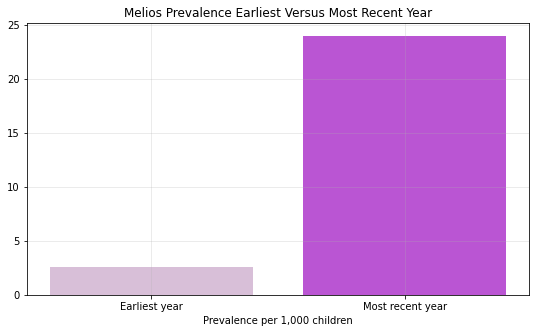

In [28]:
plt.figure()
plt.bar(["Earliest year", "Most recent year"], [earliest_avg, latest_avg], color=["thistle", "mediumorchid"])
plt.title("Melios Prevalence Earliest Versus Most Recent Year")
plt.xlabel("Prevalence per 1,000 children")
plt.grid(alpha=0.3)
plt.show()


Conclusion  
The most recent year shows a higher prevalence than the earliest year.


## Final Reflection
This journal shows my full workflow from raw data to cleaned data and final analysis. I used Python to clean the dataset and make visualizations that explain autism prevalence patterns.


## AI and Internet Sources
OpenAI ChatGPT was used to assist with Python code formatting and notebook organization.
